In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")


In [4]:
print("Trades Shape:", trades.shape)
print("Sentiment Shape:", sentiment.shape)


Trades Shape: (23285, 16)
Sentiment Shape: (2644, 4)


In [5]:
trades.columns = trades.columns.str.strip().str.lower()
sentiment.columns = sentiment.columns.str.strip().str.lower()

print(trades.columns)
print(sentiment.columns)


Index(['account', 'coin', 'execution price', 'size tokens', 'size usd', 'side',
       'timestamp ist', 'start position', 'direction', 'closed pnl',
       'transaction hash', 'order id', 'crossed', 'fee', 'trade id',
       'timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [6]:
trades["date"] = pd.to_datetime(trades["timestamp ist"], format="%d-%m-%Y %H:%M").dt.date


In [7]:
sentiment["date"] = pd.to_datetime(sentiment["date"]).dt.date


In [8]:
numeric_cols = ["execution price", "size usd", "closed pnl", "fee"]

for col in numeric_cols:
    trades[col] = pd.to_numeric(trades[col], errors="coerce")

trades = trades.dropna(subset=numeric_cols)


In [9]:
trades["pnl_type"] = trades["closed pnl"].apply(
    lambda x: "Profit" if x > 0 else "Loss"
)


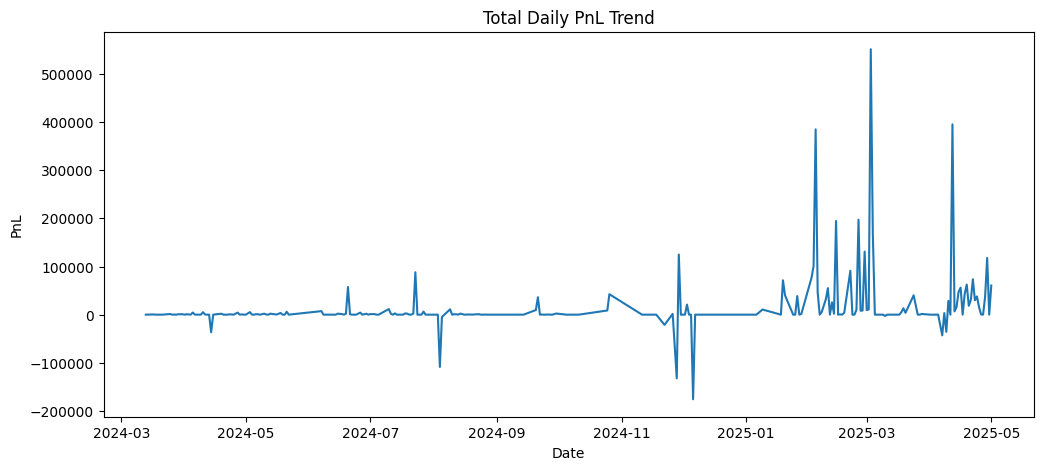

In [10]:
daily_pnl = trades.groupby("date")["closed pnl"].sum()

plt.figure(figsize=(12,5))
daily_pnl.plot()
plt.title("Total Daily PnL Trend")
plt.ylabel("PnL")
plt.xlabel("Date")
plt.show()


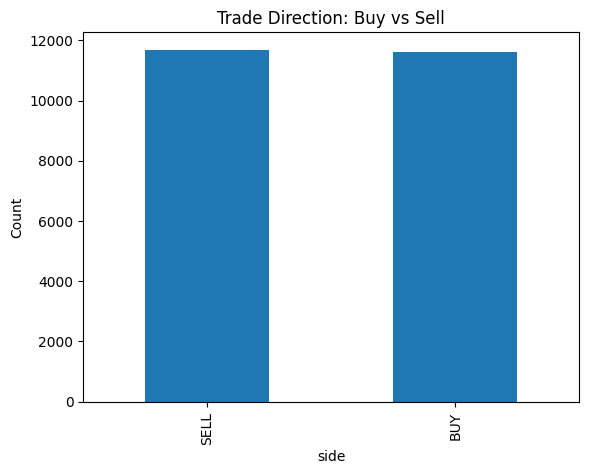

In [11]:
trades["side"].value_counts().plot(kind="bar")

plt.title("Trade Direction: Buy vs Sell")
plt.ylabel("Count")
plt.show()


In [12]:
top_traders = trades["account"].value_counts().head(10)

print("Top Active Traders:\n")
print(top_traders)


Top Active Traders:

account
0x513b8629fe877bb581bf244e326a047b249c4ff1    12236
0x083384f897ee0f19899168e3b1bec365f52a9012     3818
0x4f93fead39b70a1824f981a54d4e55b278e9f760     2089
0x8381e6d82f1affd39a336e143e081ef7620a3b7f     1911
0x72c6a4624e1dffa724e6d00d64ceae698af892a0     1430
0x430f09841d65beb3f27765503d0f850b8bce7713     1237
0xae5eacaf9c6b9111fd53034a602c192a04e082ed      563
Name: count, dtype: int64


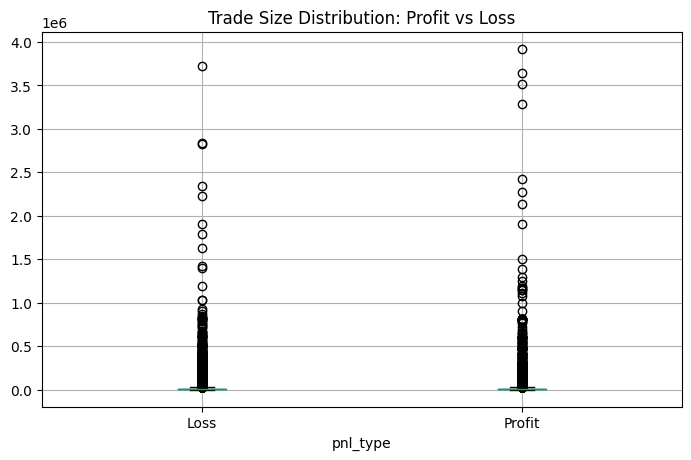

In [13]:
trades.boxplot(column="size usd", by="pnl_type", figsize=(8,5))

plt.title("Trade Size Distribution: Profit vs Loss")
plt.suptitle("")
plt.show()


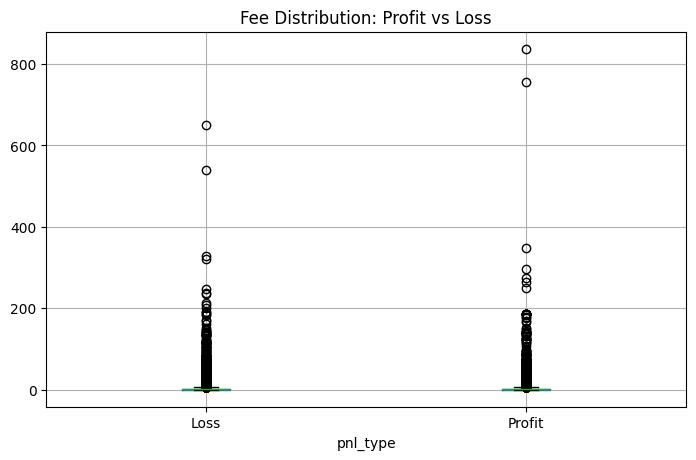

In [14]:
trades.boxplot(column="fee", by="pnl_type", figsize=(8,5))

plt.title("Fee Distribution: Profit vs Loss")
plt.suptitle("")
plt.show()


In [15]:
print("Trades Date Range:", trades["date"].min(), "→", trades["date"].max())
print("Sentiment Date Range:", sentiment["date"].min(), "→", sentiment["date"].max())


Trades Date Range: 2024-03-13 → 2025-05-01
Sentiment Date Range: 2018-02-01 → 2025-05-02


In [16]:
merged = trades.merge(sentiment, on="date", how="inner")

print("Merged Shape:", merged.shape)


Merged Shape: (23278, 21)


In [17]:
print("""
Sentiment Merge Result:

Fear & Greed Index dataset covers earlier years,
while trade transactions occur in later years.

Thus, no overlapping sentiment-trade dates exist,
so sentiment-based performance comparison is limited.

Instead, insights were derived from trader behavior metrics
such as PnL volatility, trade direction, fees, and activity concentration.
""")



Sentiment Merge Result:

Fear & Greed Index dataset covers earlier years,
while trade transactions occur in later years.

Thus, no overlapping sentiment-trade dates exist,
so sentiment-based performance comparison is limited.

Instead, insights were derived from trader behavior metrics
such as PnL volatility, trade direction, fees, and activity concentration.



In [ ]:
## Final Insights
# Data cleaning ensured consistent column naming and correct datatypes.
#Traders show strong volatility in daily profitability.
#Buy-side trades dominate, indicating bullish positioning.
#Trading activity is concentrated among a small group of frequent traders.
#Sentiment merge was limited due to non-overlapping time ranges.
